### Import statements

In [2]:
from random import randint
import time
import pandas
import matplotlib.pyplot as plt
import math

#### Array creators

In [3]:
#--------- Random array ---------
def rand_arr(n):
    sample_arr = []
    for i in range(n):
        sample_arr.append(randint(1, n))
    return sample_arr

#------- Min sorted array -------
def min_sorted_arr(n):
    sample_arr = []
    for i in range(1, n+1):
        sample_arr.append(i)
    return sample_arr

#------- Max sorted array -------
def max_sorted_arr(n):
    sample_arr = []
    for i in range(1, n+1):
        sample_arr.append(n+1-i)
    return sample_arr

def create_array(state, size):
    if (state == "rand"):
        return rand_arr(size)
    elif (state == "min"):
        return min_sorted_arr(size)
    else: 
        return max_sorted_arr(size)


<h4 style="color: coral">Insertion Sort</h4>

Ý tưởng: Insertion Sort lấy ý tưởng từ việc chơi bài, dựa theo cách người chơi "chèn" thêm một quân bài mới vào bộ bài đã được sắp xếp trên tay.

Thuật toán:

Tại bước k = 1, 2, ..., n đưa phần tử thứ k trong mảng đã cho vào đúng vị trí trong dãy gồm k phần tử đầu tiên.
Kết quả là sau bước thứ k, sẽ có k phần tử đầu tiên được sắp xếp theo thứ tự.

In [4]:
test_arr = [4, 3, 2, 10, 12, 1, 5, 6]
def insertionSort(a):
    for i in range(len(a)):
        key = a[i]
        j = i - 1
        while (j >= 0 and a[j] > key):
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key

insertionSort(test_arr)
print(test_arr)

[1, 2, 3, 4, 5, 6, 10, 12]


<img src="img/insertion.png" width=500>

Đánh giá:

- Best Case: 0 hoán đổi, n-1 so sánh (khi dãy đầu vào là đã được sắp)
- Worst Case: n^2/2 hoán đổi và so sánh (khi dãy đầu vào có thứ tự ngược lại với thứ tự cần sắp xếp)
- Average Case: n^2/4 hoán đổi và so sánh
- Memory: O(1)
- Stable: Yes
- Method: Insertion

<h4 style="color: coral">Bubble Sort</h4>

Ý tưởng: Bubble Sort, là thuật toán đẩy phần tử lớn nhất xuống cuối dãy, đồng thời những phần tử có giá trị nhỏ hơn sẽ dịch chuyển dần về đầu dãy.

Thuật toán: Duyệt mảng từ phần tử đầu tiên. So sánh mỗi phần tử với phần tử liền trước nó, nếu đứng sai vị trí, ta sẽ đổi chỗ cho nhau. Quá trình này sẽ được dừng nếu gặp lần duyệt từ đầu dãy đến cuối dãy mà không phải thực hiện đổi chỗ bất kì 2 phần từ nào (tức là tất cả các phần tử đã được sắp xếp đúng vị trí).

In [5]:
test_arr = [7, 4, 1, 9, 2]
def bubbleSort(a):
    for i in range(len(a)-1):
        for j in range(len(a)-i-1):
            if (a[j] > a[j+1]):
                temp = a[j]
                a[j] = a[j+1]
                a[j+1] = temp
                
bubbleSort(test_arr)
print(test_arr)

[1, 2, 4, 7, 9]


<img src="img/bubble.png" width=600>

Đánh giá:

- Best case: 0 đổi chỗ, n^2/2 so sánh.
- Worst case: n^2/2 đổi chỗ và so sánh.
- Average case: n^2/4 đổi chỗ và n^2/2 so sánh.
- Memory: O(1)
- Stable: Yes
- Method: Exchanging

<h4 style="color: coral">Selection Sort</h4>

Ý tưởng của Selection sort là tìm từng phần tử cho mỗi vị trí của mảng hoán vị A' cần tìm.

Thuật toán:

- Tìm phần tử nhỏ nhất đưa vào vị trí 1
- Tìm phần tử nhỏ tiếp theo đưa vào vị trí 2
- Tìm phần tử nhỏ tiếp theo đưa vào vị trí 3
- ...

In [6]:
test_arr = [7, 5, 4, 2]
def selectionSort(a):
    for i in range(len(a)):
        min = i
        for j in range(i, len(a)):
            if (a[j] < a[min]):
                min = j
        temp = a[min]
        a[min] = a[i]
        a[i] = temp

selectionSort(test_arr)
print(test_arr)

[2, 4, 5, 7]


<img src="img/selection.png" width=500>

Đánh giá:

- Best case: 0 đổi chỗ (n-1 như trong đoạn mã), n^2/2 so sánh
- Worst case: n - 1 đổi chỗ và n^2/2 so sánh
- Average case: O(n) đổi chỗ và n^2/2 so sánh
- Memmory: O(1)
- Stable: No
- Method: Selection

### So sánh 3 thuật toán O(n^2): Insertion, Bubble, Selection.
<img src="img/compare.png" width=800>

<h4 style="color: coral">Merge Sort</h4>

##### Ý tưởng:
Sắp xếp trộn (merge sort) là một thuật toán sắp xếp loại so sánh. Thuật toán này là một ví dụ tương đối điển hình của lối thuật toán chia để trị của John von Neumann:

- Chia (Divide): Chia dãy gồm n phần tử cần sắp xếp thành 2 dãy, mỗi dãy có n/2 phần tử.
- Trị (Conquer): Sắp xếp mỗi dãy con một cách đệ quy sử dụng sắp xếp trộn. Khi dãy chỉ còn một phần tử thì trả lại phần tử này.
- Tổ hợp (Combine): Trộn (Merge) hai dãy con được sắp xếp để thu được dãy được sắp xếp gồm tất cả các phần tử của cả hai dãy con.

Giả sử có hai dãy đã được sắp xếp <i>L[l..n1]</i> và <i>R[1..n2]</i>. Ta có thể trộn chúng lại thành một dãy mới <i>M[1..n1+n2]</i> được sắp xếp theo cách sau:

- So sánh hai phần tử đứng đầu của hai dãy, lấy phần tử nhỏ hơn cho vào dãy mới. Tiếp tục như vậy cho tới khi một trong hai dãy rỗng.
- Khi một trong hai dãy rỗng, ta lấy phần còn lại của dãy kia cho vào cuối dãy mới.
Khi đó, ta sẽ thu được dãy cần tìm.

In [7]:
test_arr = [38, 27, 43, 3, 9, 82, 10]
def merge(a, l, m, r):
    n1 = m - l + 1
    n2 = r - m
    L = [x for x in range(n1)]
    R = [x for x in range(n2)]
    for i in range(0, n1):
        L[i] = a[l + i]
    for j in range(0, n2):
        R[j] = a[m + 1 + j]
    i = 0
    j = 0
    k = l
    while (i < n1 and j < n2):
        if (L[i] <= R[j]):
            a[k] = L[i]
            i += 1
        else:
            a[k] = R[j]
            j += 1
        k += 1
    while (i < n1):
        a[k] = L[i]
        i += 1
        k += 1
    while (j < n2):
        a[k] = R[j]
        j += 1
        k += 1
def mergeSort(a, l, r):
    if (l < r):
        m = int(l + (r-l)/2)
        mergeSort(a, l, m)
        mergeSort(a, m+1, r)
        merge(a, l, m, r)

mergeSort(test_arr, 0, 6)
print(test_arr)

[3, 9, 10, 27, 38, 43, 82]


<img src="img/merge.png" width=500>

Đánh giá:

- Best case: O(n*log*n)
- Worst case: O(n*log*n)
- Average case: O(n*log*n)
- Memmory: O(n)
- Stable: Yes
- Method: Merging

<h4 style="color: coral">Quick Sort</h4>

##### Ý tưởng:
Tương tự như Merge sort, Quick sort là thuật toán sắp xếp được phát triển dựa trên kỹ thuật chia để trị:

1. Neo đệ qui (Base case). Nếu dãy chỉ còn một phần tử thì nó là dãy đã sắp xếp và trả lại dãy này mà không phải làm gì cả.
2. Chia (Divide):
- Chọn một phần tử trong dãy và gọi nó là phần tử chốt p (pivot).
- Chia dãy đã cho ra thành hai dãy con: Dãy con trái (L) gồm những phần tử không lớn hơn phần tử chốt, còn dãy con phải (R) gồm các phần tử không nhỏ hơn phần tử chốt. Thao tác này được gọi là thao tác Phân đoạn (Partition).
3. Trị (Conquer): Lặp lại một cách đệ qui thuật toán đối với hai dãy con L và R.
4. Tổng hợp (Combine): Dãy được sắp xếp là L p R.

<b>Chọn phần tử chốt:</b>

Việc chọn phần tử chốt nắm vai trò quyết định đối với hiệu năng của thuật toán. Tốt nhất là chọn phần tử chốt là trung vị của danh sách. Tuy nhiên cách này rất khó nên ta có thể chọn phần tử chốt theo những cách sau:

- Chọn phần tử đứng đầu hoặc đứng cuối làm phần tử chốt.
- Chọn phần tử đứng giữa dãy làm phần tử chốt.
- Chọn phần tử trung vị trong 3 phần tử đứng đầu, đứng giữa và đứng cuối làm phần tử chốt.
- Chọn phần tử ngẫu nhiên làm phần tử chốt. (Cách này có thể dẫn đến khả năng rơi vào các trường hợp đặc biệt).

Thuật toán bên dưới chọn phần tử chốt là phần tử cuối.

Thuật toán Phân đoạn Partition: Mục đích của hàm Partition(A, left, right) là chia <i>A[left..right]</i> thành hai đoạn <i>A[left..pivot –1]</i> và <i>*A[pivot+1..right]</i>, sao cho:

- <i>A[left..pivot –1]</i> là tập hợp các phần tử có giá trị nhỏ hơn hoặc bằng <i>A[pivot]</i>.
- <i>A[pivot+1..right]</i> là tập hợp các phần tử có gía trị lớn hơn <i>A[pivot]</i>.

In [8]:
test_arr = [13, 81, 92, 43, 65, 31, 57, 26, 75, 0]
def partition(a, low, high):
    pivot = a[high]
    i = low - 1
    for j in range(low, high):
        if a[j] <= pivot:
            i = i + 1
            (a[i], a[j]) = (a[j], a[i])
    (a[i + 1], a[high]) = (a[high], a[i + 1])
    return i + 1

def quickSort(a, low, high):
    if (low < high):
        pi = partition(a, low, high)

        quickSort(a, low, pi - 1)
        quickSort(a, pi + 1, high)

quickSort(test_arr, 0, 9)
print(test_arr)

[0, 13, 26, 31, 43, 57, 65, 75, 81, 92]


<img src="img/quick.png" width=600>

Đánh giá: Thời gian tính của Quick-Sort phụ thuộc vào việc phép phân đoạn là cân bằng (balanced) hay không cân bằng (unbalanced), và điều này lại phụ thuộc vào việc chọn phần tử chốt.

- Phân đoạn không cân bằng: O(n2/2)
- Phân đoạn hoàn hảo: O(n*logn)
- Memory: O(logn)
- Stable: No
- Method: Partitioning

<h4 style="color: coral">Heap Sort</h4>

##### Ý tưởng:
1. Với một tập danh sách n phần từ T1 – T2 – T3… Tn. Ta coi nó như một cây nhị phân.
2. Quy định cho cây nhị phân như nhau.
Nếu một node là tại vị trí = i thì node này có 2 nhánh trái và phải tương ứng như sau:
+ Nhánh trái là phần tử 2*i + 1 và nhánh phải là 2*i+ 2 với điều kiện là < n
3. Nguyên lý được thực hiện như sau:
+ Xây dựng đống sao cho với mọi nút cha đều có giá trị lớn hơn nút con => nút gốc đầu tiên sẽ có giá trị lớn nhất.
+ Bốc nút lớn nhất ra và xếp vào mảng.
+ Hoán vị nút gốc với nút thứ n-1 và xây dựng lại đống mới với n-2, sau đó tiếp tục hoán vị nút gốc với nút cuối của cây mới sau n-2.

In [9]:
test_arr = [1, 3, 5, 4, 2]
def heapify(arr, N, i):
    largest = i       # Gán phần tử max = root
    l = 2 * i + 1     # Trái = 2*i + 1
    r = 2 * i + 2     # Phải = 2*i + 2
 
    if l < N and arr[largest] < arr[l]:
        largest = l

    if r < N and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
        heapify(arr, N, largest)
 
def heapSort(arr):
    N = len(arr)

    for i in range(N//2 - 1, -1, -1): #Vun đống: phần tử max = root
        heapify(arr, N, i)

    for i in range(N-1, 0, -1): #Rút phần tử max = root ra khỏi cây
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

heapSort(test_arr)
print(test_arr)

[1, 2, 3, 4, 5]


<img src="img/heap.png" width=800><br><br>
Đánh giá:
- Average: O(n*logn)
- Wost: O(n*logn)
- Memory: O(1)
- Stable: No
- Method: Selection

<h4 style="color: coral">Shell Sort</h4>

#### Ý tưởng:
- Shell sort tương tự như insertion sort nhưng trước khi sử dụng insertion sort chúng ta sẽ xét trên các khoảng và đổi chỗ các nghịch thế, điều này giúp làm giảm việc phải so sánh quá nhiều phần từ như insertion sort.
#### Ví dụ:
<img src="img/shell1.png" width=400><br>
- Đầu tiên chúng ta lấy gap = 4 và đổi chỗ tất cả các nghịch thế xuất hiện

<img src="img/shell2.png" width=400><br>
- Mảng sau khi đảo các nghịch thế với gap = 4

<img src="img/shell3.png" width=400><br>
- Sau đó chúng ta lấy gap = 2 và thực hiện tương tự bước trên

<img src="img/shell4.png" width=400><br>
- Mảng sau bước gap = 2

<img src="img/shell5.png" width=400><br>
- Cuối cùng sử dụng bước gap = 1 tương đương với insertion sort để sắp xếp mảng.

In [10]:
test_arr = [35, 33, 42, 10, 19, 27, 44]
def shellSort(arr):
    n = len(arr)
    gap = int(n/2)
    while gap > 0:
        for i in range(gap,n):
            temp = arr[i]
            j = i
            while  j >= gap and arr[j-gap] >temp:
                arr[j] = arr[j-gap]
                j -= gap
            arr[j] = temp
        gap = round(gap / 2)
 
shellSort(test_arr)
print(test_arr)

[10, 19, 27, 33, 35, 42, 44]


Đánh giá:
- Average: NULL
- Wost: O(n*log^2n)
- Memory: O(1)
- Stable: No
- Method: Insertion

<h4 style="color: coral">Shaker Sort</h4>

#### Ý tưởng:
- Shaker sort là thuật toán cải tiến của Bubble sort khi đồng thời đẩy phần tử nhỏ nhất về đầu dãy và lớn nhất về cuối dãy.
#### Ví dụ:
<img src="img/shaker1.png" width=1100><br>
- Sau lần duyệt từ đầu mảng phần tử bự nhất sẽ bị đẩy xuống cuối mảng.

<img src="img/shaker2.png" width=1100><br>
- Sau lần duyệt từ cuối mảng đầu tiên phần tử bé nhất sẽ bị đẩy lên đầu mảng.

<img src="img/shaker3.png" width=1100><br>
- Sau lần duyệt từ đầu mảng thứ hai phần tử bự nhì sẽ bị đẩy xuống liền trái phần tử bự nhất trong mảng.

<img src="img/shaker4.png" width=1100><br>
- Sau lần duyệt từ cuối mảng thứ hai phần tử bé nhì sẽ bị đẩy lên liền phải phần tử bé nhất mảng.

##### <u>Tương tự cho các lần duyệt tiếp theo và chúng ta sẽ có mảng được sắp xếp.</u>

In [11]:
test_arr = [1, 3, 5, 4, 2]
def shakerSort(a):
    n = len(a)
    swapped = True
    start = 0
    end = n-1
    while (swapped == True):
        swapped = False
        for i in range(start, end):
            if (a[i] > a[i + 1]):
                a[i], a[i + 1] = a[i + 1], a[i]
                swapped = True
        if (swapped == False):
            break
        swapped = False
        end = end-1
        for i in range(end-1, start-1, -1):
            if (a[i] > a[i + 1]):
                a[i], a[i + 1] = a[i + 1], a[i]
                swapped = True
        start = start + 1
 
shakerSort(test_arr)
print(test_arr)

[1, 2, 3, 4, 5]


Đánh giá:
- Average: NULL
- Wost: O(n^2)
- Memory: O(1)
- Stable: Yes
- Method: Exchanging

<h4 style="color: coral">Radix Sort</h4>

#### Ý tưởng:
- Radix sort là thuật toán không dựa trên so sánh 2 phần tử mà sử dụng việc phân loại phần tử theo lần lượt các chữ số: hàng đơn vị, hàng chục, hàng trăm,...
#### Ví dụ:
- [43, 613, 831, 987, 17, 210, 1990, 1234]: cho một mảng các số dương như trên.
- Đầu tiên mảng sẽ được chia thành các nhóm có cùng hàng đơn vị: <br><br>
[210, 1990] : nhóm 0<br>
[831] : nhóm 1<br>
[43, 613] : nhóm 3<br>
[1234] : nhóm 4<br>
[987, 17] : nhóm 7<br><br>
- Sau khi chia nhóm theo hàng đơn vị, thứ tự các phần tử trong mảng sẽ như sau:<br><br>
[210, 1990, 831, 43, 613, 1234, 987, 17]<br><br>
- Tiếp theo, mảng sẽ được chia thành các nhóm dựa vào hàng chục. Kết quả chúng ta được các nhóm:<br><br>
[210, 613, 17] : nhóm 1<br>
[831, 1234] : nhóm 3<br>
[43] : nhóm 4<br>
[987] : nhóm 8<br>
[1990] : nhóm 9<br><br>
- Sau khi chia nhóm theo hàng chục, thứ tự các phần tử trong mảng sẽ như sau:<br><br>
[210, 613, 17, 831, 1234, 43, 987, 1990]<br><br>
- Thuật toán tiếp tục thực hiện với chữ số hàng trăm, chúng ta được các nhóm sau:<br><br>
[17, 43] : nhóm 0<br>
[210, 1234] : nhóm 2<br>
[613] : nhóm 6<br>
[831] : nhóm 8<br>
[987, 1990] : nhóm 9<br><br>
- Sau khi chia nhóm theo hàng trăm, thứ tự các phần tử trong mảng sẽ như sau:<br><br>
[17, 43, 210, 1234, 613, 831, 987, 1990]<br><br>
- Sau khi chia nhóm theo hàng nghìn, thứ tự các phần tử trong mảng sẽ như sau:<br><br>
[17, 43, 210, 613, 831, 987, 1234, 1990]<br><br>
- <b>Như vậy mảng đã được sắp xếp.</b>

In [12]:
test_arr = [43, 613, 831, 987, 17, 210, 1990, 1234]
def countingSort(arr, exp1):
    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
    for i in range(0, n):
        index = (arr[i]/exp1)
        count[int((index)%10)] += 1
    for i in range(1,10):
        count[i] += count[i-1]
    i = n-1
    while i>=0:
        index = (arr[i]/exp1)
        output[ count[ int((index)%10) ] - 1] = arr[i]
        count[int((index)%10)] -= 1
        i -= 1
    i = 0
    for i in range(0,len(arr)):
        arr[i] = output[i]

def radixSort(arr):
    max1 = max(arr)
    exp = 1
    while max1/exp > 0:
        countingSort(arr,exp)
        exp *= 10

radixSort(test_arr)
print(test_arr)

[17, 43, 210, 613, 831, 987, 1234, 1990]


Đánh giá:
- Average: O(n)
- Wost: O(n)
- Memory: O(n^2)
- Stable: No
- Method: Insertion

<h4 style="color: coral">Counting Sort</h4>

#### Ý tưởng:
- Counting sort là một thuật toán sắp xếp cực nhanh một mảng các phần tử mà mỗi phần tử là các số nguyên không âm;Hoặc là một danh sách các ký tự được ánh xạ về dạng số để sort theo bảng chữ cái. 
- Counting sort là một thuật toán sắp xếp các con số nguyên không âm, không dựa vào so sánh. 
- Trong khi các thuật toán sắp xếp tối ưu sử dụng so sánh có độ phức tạp O(nlogn) thì Counting sort chỉ cần O(n) nếu độ dài của danh sách không quá nhỏ so với phần tử có giá trị lớn nhất.
#### Ví dụ:
- [3, 5, 1, 6, 7, 8, 3]: cho một mảng các số dương như dưới.
- Đầu tiên chúng ta sẽ tìm phần tử lớn nhất trong mảng.

<img src="img/counting1.png" width=600>

- Bây giờ chúng ta sẽ khởi tạo mảng mới có tên mảng đếm có độ dài “max + 1” với tất cả các phần tử 0 để lưu trữ dữ liệu đã sắp xếp.

<img src="img/counting2.png" width=500>

- Sau đó, chúng ta sẽ lưu trữ các phần tử của mảng đã cho với chỉ số tương ứng trong mảng đếm như trong hình. 

<img src="img/counting3.png" width=500>

- Bây giờ, chúng ta sẽ sửa đổi mảng đếm bằng cách thêm các số trước đó và tạo tổng tích lũy của một mảng như hình dưới đây:

<img src="img/counting4.png" width=500>

- Vì có 7 đầu vào trong mảng ban đầu, ta sẽ tạo một mảng trống khác có 7 vị trí để lưu trữ dữ liệu đã sắp xếp và đặt các phần tử vào đúng vị trí của chúng và giảm số lượng đi một.

<img src="img/counting5.png" width=500>

- Duyệt mảng và lặp lại bước trên và có được mảng đã sắp xếp.

<img src="img/counting6.png" width=500>

In [13]:
test_arr = [3, 5, 1, 6, 7, 8, 3]
def countSort(input):
    output = [0] * len(input)
    max = input[0]
    min = input[0]
    for i in range(1, len(input)):
        if input[i] > max:
            max = input[i]
        elif input[i] < min:
            min = input[i]
    k = max - min + 1
    count_list = [0] * k
    for i in range(0, len(input)):
        count_list[input[i] - min] += 1
    for i in range(1, k):
        count_list[i] += count_list[i - 1]
    for i in range(0, len(input)):
        output[count_list[input[i] - min] - 1] = input[i]
        count_list[input[i] - min] -= 1
    for i in range(0, len(input)):
        input[i] = output[i]

countSort(test_arr)
print(test_arr)

[1, 3, 3, 5, 6, 7, 8]


Đánh giá:
- Average: O(n)
- Wost: O(n)
- Memory: O(1)
- Stable: Yes
- Method: Insertion

<h4 style="color: coral">Binery Insertion Sort</h4>

#### Ý tưởng:
- Tương tự như sắp xếp chèn. Tuy nhiên chúng ta sử dụng tìm kiếm nhị phân để tìm phần tử thay vì tìm kiếm tuần tự.

In [14]:
test_arr = [1, 5, 3, 4, 8, 6, 3, 4]

def binaryInsertionSort(arr):
   for i in range(1, len(arr)):
      temp = arr[i]
      pos = binarySearch(arr, temp, 0, i) + 1
      for k in range(i, pos, -1):
         arr[k] = arr[k - 1]
      arr[pos] = temp

def binarySearch(arr, key, start, end):
   if end - start <= 1:
      if key < arr[start]:
         return start - 1
      else:
         return start
   mid = (start + end)//2
   if arr[mid] < key:
      return binarySearch(arr, key, mid, end)
   elif arr[mid] > key:
      return binarySearch(arr, key, start, mid)
   else:
      return mid

binaryInsertionSort(test_arr)
print(test_arr)

[1, 3, 3, 4, 4, 5, 6, 8]


Đánh giá:
- Average: O(n^2)
- Wost: O(n^2)
- Memory: O(logn)
- Stable: Yes
- Method: Insertion

<h4 style="color: coral">Flash Sort</h4>

#### Ý tưởng:
- Là thuật toán áp dụng Bucket sort đưa về mảng gần như đã sắp xếp và sử dụng Insertion sort để hoàn thành việc sắp xếp.
#### Ví dụ:
- Cho mảng [-5, 2, -1, 0, 6, 3, 9].
- Chúng ta sẽ chia số xô là bucket = 0.45 * 7(độ dài mảng) sau đó làm tròn xuống là 3 xô.

In [15]:
test_arr = [-5, 2, -1, 0, 6, 3, 9]
def flashSort(arr):
    bucket = math.floor(float(0.45 * len(arr)))
    a = [0]* bucket
    max = arr[0]
    min = arr[0]
    for i in range(1, len(arr)):
        if (arr[i] < min):
            min = arr[i]
        if (arr[i] > max):
            max = arr[i]
    for i in range(len(arr)):
        k = math.floor(float((bucket-1) * (arr[i]-min)) / (max-min))
        a[k] += 1
    for i in range(1, bucket):
        a[i] = a[i] + a[i-1]
    hold = arr[0]
    move = 0
    flash = 0
    k = 0
    t = 0
    j = 0
    while (move < (len(arr)-1)):
        while(j > (a[k]-1)):
            j += 1
            k = math.floor(float((bucket-1) * (arr[j]-min)) / (max-min))
        flash = arr[j]
        while (j != a[k]):
            k = math.floor(float((bucket-1) * (arr[j]-min)) / (max-min))
            t = a[k] - 1
            hold = arr[t]
            a[k] -= 1
            arr[t] = hold
            flash = hold
            move += 1
    insertionSort(arr)

flashSort(test_arr)
print(test_arr)

[-5, -1, 0, 2, 3, 6, 9]


Đánh giá:
- Average: O(n)
- Wost: O(n)
- Memory: O(n^2)
- Stable: No
- Method: Insertion

<h3 style="color: green">Variables</h3>

In [16]:
# size_set = [1000, 3000, 10000, 30000, 100000]
size_set = [1000, 3000, 10000]
state_set = ["rand", "min", "max"]
algorithms_set = [
            insertionSort, 
            bubbleSort, 
            selectionSort, 
            heapSort, 
            mergeSort,
            shellSort,
            # quickSort,
            shakerSort,
            radixSort,
            flashSort,
            countSort,
            binaryInsertionSort
]
run_time_data = {
    "Input state": [],
    "Input Size": [],
    "Insertion": [],
    "Bubble": [],
    "Selection": [],
    "Heap": [],
    "Merge": [],
    "Shell": [],
    # "Quick": [],
    "Shaker": [],
    "Radix": [],
    "Flash": [],
    "Count": [],
    "Binary Insertion": [],
}

### RUN TIME

In [17]:
for state in state_set:    
    for size in size_set:
        run_time_data["Input state"].append(str(state))
        run_time_data["Input Size"].append(str(size))
        for algo in algorithms_set:
            # create new array
            array = create_array(state, size)
            
            # get the start time
            st = time.time()

            # Execution function
            if (algo == mergeSort or algo == quickSort):
                algo(array, 0, len(array)-1)
            else:
                algo(array)

            # get the end time
            et = time.time()

            # get the execution time
            elapsed_time = round(et - st, 5)
            if (algo == insertionSort):
                with open(f"result/Insertion_{state}_{size}.txt", 'w') as fp: #get the txt result file 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Insertion"].append(elapsed_time)
            elif (algo == bubbleSort):
                with open(f"result/Bubble_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Bubble"].append(elapsed_time)
            elif (algo == selectionSort):
                with open(f"result/Selection_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Selection"].append(elapsed_time)
            elif (algo == heapSort):
                with open(f"result/Heap_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Heap"].append(elapsed_time)
            elif (algo == mergeSort):
                with open(f"result/Merge_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Merge"].append(elapsed_time)
            elif (algo == shellSort):
                with open(f"result/Shell_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Shell"].append(elapsed_time)
            # elif (algo == quickSort):
            #     with open(f"result/Quick_{state}_{size}.txt", 'w') as fp: 
            #         for a in array:
            #             fp.write(f" {a}")
            #     run_time_data["Quick"].append(elapsed_time)  
            elif (algo == shakerSort):
                with open(f"result/Shaker_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Shaker"].append(elapsed_time)   
            elif (algo == radixSort):
                with open(f"result/Radix_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Radix"].append(elapsed_time)  
            elif (algo == flashSort):
                with open(f"result/Flash_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Flash"].append(elapsed_time)
            elif (algo == binaryInsertionSort):
                with open(f"result/Binary_Insertion_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Binary Insertion"].append(elapsed_time) 
            elif (algo == countSort):
                with open(f"result/Count_{state}_{size}.txt", 'w') as fp: 
                    for a in array:
                        fp.write(f" {a}")
                run_time_data["Count"].append(elapsed_time)  
            # print(f'Execution time {(size)} {(state)}: ', elapsed_time, 'seconds')

data = pandas.DataFrame(run_time_data)
data.to_csv("Runtime.csv")

### Data Exploration

In [18]:
df = pandas.read_csv('Runtime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9 non-null      int64  
 1   Input state       9 non-null      object 
 2   Input Size        9 non-null      int64  
 3   Insertion         9 non-null      float64
 4   Bubble            9 non-null      float64
 5   Selection         9 non-null      float64
 6   Heap              9 non-null      float64
 7   Merge             9 non-null      float64
 8   Shell             9 non-null      float64
 9   Shaker            9 non-null      float64
 10  Radix             9 non-null      float64
 11  Flash             9 non-null      float64
 12  Count             9 non-null      float64
 13  Binary Insertion  9 non-null      float64
dtypes: float64(11), int64(2), object(1)
memory usage: 1.1+ KB


In [19]:
df.describe()

,Unnamed: 0,Input Size,Insertion,Bubble,Selection,Heap,Merge,Shell,Shaker,Radix,Flash,Count,Binary Insertion
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,4.000000,4666.666667,6.035621,11.805922,4.737170,0.145858,0.107048,0.050832,10.839136,8.287948,6.867718,0.015996,3.421266
std,2.738613,4092.676386,11.659733,16.979522,6.188975,0.126569,0.103302,0.054838,19.643154,7.789667,13.875008,0.013998,7.106830
min,0.000000,1000.000000,0.000000,0.136970,0.113100,0.032800,0.029310,0.003160,0.000000,1.338720,0.008550,0.003860,0.012430
25%,2.000000,1000.000000,0.001990,0.518800,0.209600,0.042770,0.039000,0.015540,0.008280,2.148180,0.066880,0.005300,0.079130
50%,4.000000,3000.000000,0.295080,2.088500,1.181870,0.099940,0.046380,0.023800,0.808910,4.553750,0.318360,0.008300,0.160010
75%,6.000000,10000.000000,3.755410,21.077330,12.062470,0.186120,0.196400,0.074820,4.256340,17.334960,3.172940,0.031290,1.397490
max,8.000000,10000.000000,34.580410,47.819420,13.698750,0.410230,0.297770,0.172560,48.655630,19.845550,41.350070,0.036760,21.368880


In [20]:
reshape_df = df[df["Input state"] == "rand"]
randomize_input = reshape_df[["Input Size", "Insertion", "Bubble", "Selection", "Heap", "Merge", "Shell", "Shaker", "Radix", "Count", "Binary Insertion", "Flash"]]
randomize_input.head()

,Input Size,Insertion,Bubble,Selection,Heap,Merge,Shell,Shaker,Radix,Count,Binary Insertion,Flash
0,1000,0.12487,0.25663,0.11310,0.03280,0.04106,0.00316,0.32281,1.33872,0.00431,0.07913,0.11286
1,3000,1.28639,1.99620,0.91101,0.09994,0.04638,0.02380,1.60281,4.89570,0.00611,0.53575,1.15838
2,10000,14.27544,28.37877,13.69875,0.27758,0.29777,0.17256,41.89744,19.84555,0.03129,7.10562,15.59679


#### Randomize input

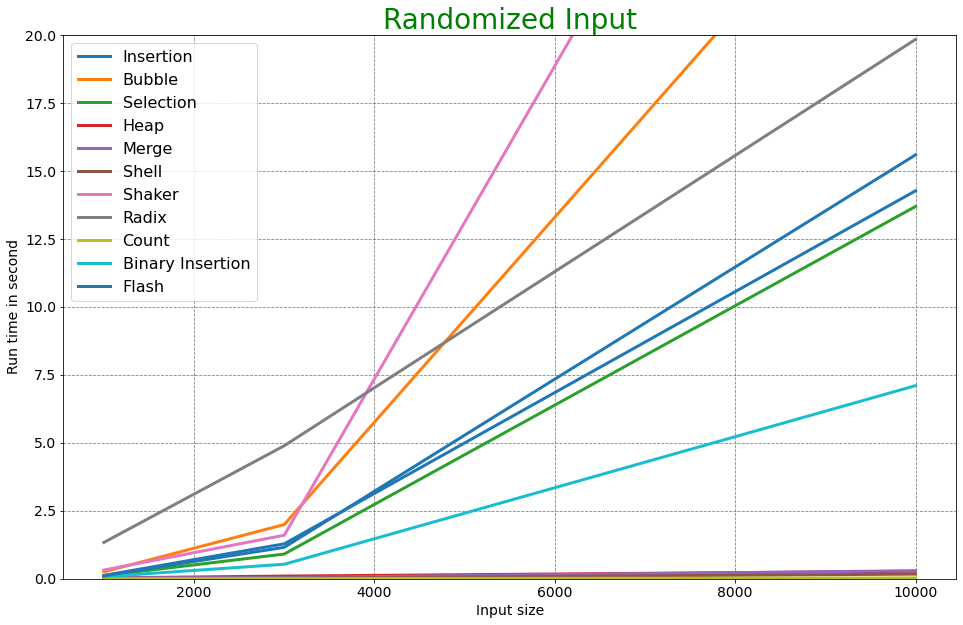

In [21]:
plt.figure(figsize=(16,10)) 
plt.grid(color='grey', linestyle='--')
plt.title('Randomized Input', fontsize=28, color="green")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Input size', fontsize=14)
plt.ylabel('Run time in second', fontsize=14)
plt.ylim(0, 20)

for column in randomize_input.columns:
    if (column != "Input Size"):
        plt.plot(randomize_input["Input Size"], randomize_input[column], label=randomize_input[column].name, linewidth=3)

plt.legend(fontsize=16) 
plt.show()

#### Min Sorted Iput 

In [22]:
reshape_df = df[df["Input state"] == "min"]
min_sorted_input = reshape_df[["Input Size", "Insertion", "Bubble", "Selection", "Heap", "Merge", "Shell", "Shaker", "Radix", "Count", "Binary Insertion", "Flash"]]
min_sorted_input.head()

,Input Size,Insertion,Bubble,Selection,Heap,Merge,Shell,Shaker,Radix,Count,Binary Insertion,Flash
3,1000,0.00000,0.13697,0.11400,0.04277,0.02931,0.01554,0.00000,2.14818,0.00386,0.01243,0.00855
4,3000,0.00199,2.08850,1.18187,0.12317,0.05403,0.02065,0.00000,4.55375,0.01356,0.03316,0.02463
5,10000,0.00100,21.07733,13.09080,0.41023,0.22582,0.07482,0.00828,17.33496,0.03447,0.09892,0.06688


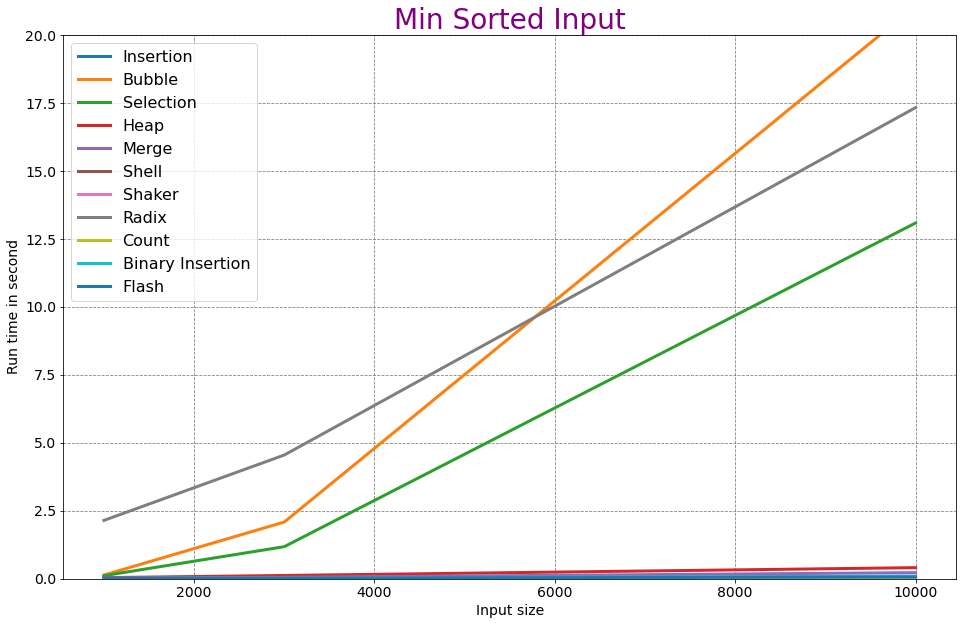

In [23]:
plt.figure(figsize=(16,10)) 
plt.grid(color='grey', linestyle='--')
plt.title('Min Sorted Input', fontsize=28, color="purple")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Input size', fontsize=14)
plt.ylabel('Run time in second', fontsize=14)
plt.ylim(0, 20)

for column in min_sorted_input.columns:
    if (column != "Input Size"):
        plt.plot(min_sorted_input["Input Size"], min_sorted_input[column], label=min_sorted_input[column].name, linewidth=3)

plt.legend(fontsize=16) 
plt.show()

#### Max Sorted Input

In [24]:
reshape_df = df[df["Input state"] == "max"]
max_sorted_input = reshape_df[["Input Size", "Insertion", "Bubble", "Selection", "Heap", "Merge", "Shell", "Shaker", "Radix", "Count", "Binary Insertion", "Flash"]]
max_sorted_input.head()

,Input Size,Insertion,Bubble,Selection,Heap,Merge,Shell,Shaker,Radix,Count,Binary Insertion,Flash
6,1000,0.29508,0.51880,0.20960,0.04032,0.03366,0.01512,0.80891,1.62636,0.00530,0.16001,0.31836
7,3000,3.75541,3.98068,1.25293,0.09979,0.03900,0.03614,4.25634,4.54970,0.00830,1.39749,3.17294
8,10000,34.58041,47.81942,12.06247,0.18612,0.19640,0.09570,48.65563,18.29861,0.03676,21.36888,41.35007


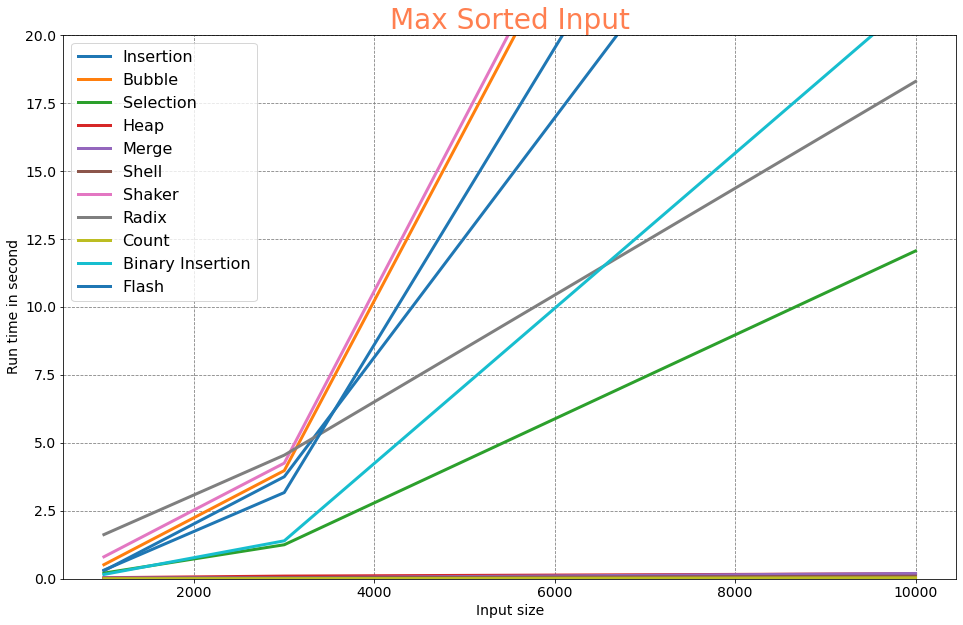

In [25]:
plt.figure(figsize=(16,10)) 
plt.grid(color='grey', linestyle='--')
plt.title('Max Sorted Input', fontsize=28, color="coral")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Input size', fontsize=14)
plt.ylabel('Run time in second', fontsize=14)
plt.ylim(0, 20)

for column in max_sorted_input.columns:
    if (column != "Input Size"):
        plt.plot(max_sorted_input["Input Size"], max_sorted_input[column], label=max_sorted_input[column].name, linewidth=3)

plt.legend(fontsize=16) 
plt.show()

### Reference links
- https://www.geeksforgeeks.org/sorting-algorithms/?ref=gcse
- https://viblo.asia/p/cac-thuat-toan-sap-xep-co-ban-Eb85ooNO52G
- https://www.tutorialspoint.com/data_structures_algorithms/shell_sort_algorithm.htm
- https://favtutor.com/blogs/counting-sort-python